In [1]:
# importing the dependencies
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing dataset
df = pd.read_csv('bodyfat.csv')

In [3]:
df.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


The bodyfat can be directly calculated by the density but in our daily life we aren't going to calculate density to measure bodyfat that's why I am droping "Density" column.

In [4]:
df.drop('Density', axis = 1, inplace = True)

In [5]:
df.head(2)

,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2


In [6]:
df.shape

(252, 14)

Definitions of the column names:

-BodyFat: Percent body fat from Siri's (1956) equation

-Age: (years)

-Weight: (lbs)

-Height: (inches)

-Neck circumference: (cm)

-Chest circumference: (cm)

-Abdomen circumference: (cm)

-Hip circumference: (cm)

-Thigh circumference: (cm)

-Knee circumference: (cm)

-Ankle circumference: (cm)

-Biceps (extended) circumference: (cm)

-Forearm circumference: (cm)

-Wrist circumference: (cm)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BodyFat,252.0,19.150794,8.368740,0.0,12.475,19.20,25.300,47.50
Age,252.0,44.884921,12.602040,22.0,35.750,43.00,54.000,81.00
Weight,252.0,178.924405,29.389160,118.5,159.000,176.50,197.000,363.15
Height,252.0,70.148810,3.662856,29.5,68.250,70.00,72.250,77.75
Neck,252.0,37.992063,2.430913,31.1,36.400,38.00,39.425,51.20
Chest,252.0,100.824206,8.430476,79.3,94.350,99.65,105.375,136.20
Abdomen,252.0,92.555952,10.783077,69.4,84.575,90.95,99.325,148.10
Hip,252.0,99.904762,7.164058,85.0,95.500,99.30,103.525,147.70
Thigh,252.0,59.405952,5.249952,47.2,56.000,59.00,62.350,87.30
Knee,252.0,38.590476,2.411805,33.0,36.975,38.50,39.925,49.10


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BodyFat  252 non-null    float64
 1   Age      252 non-null    int64  
 2   Weight   252 non-null    float64
 3   Height   252 non-null    float64
 4   Neck     252 non-null    float64
 5   Chest    252 non-null    float64
 6   Abdomen  252 non-null    float64
 7   Hip      252 non-null    float64
 8   Thigh    252 non-null    float64
 9   Knee     252 non-null    float64
 10  Ankle    252 non-null    float64
 11  Biceps   252 non-null    float64
 12  Forearm  252 non-null    float64
 13  Wrist    252 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 27.7 KB


Every column is either int or float

In [9]:
df.isnull().sum()

BodyFat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64

There is no null value in this dataset

In [10]:
df.duplicated().sum()

0

There is no duplicate value

In [11]:
df['BodyFat'][df['BodyFat'] <= 5.0 ].count()

8

1. There is only 8 people below or equal 5% body fat.
2. In reality very few people exist with low body fat and they are considered very unhealthy
3. I will drop the row having bodyfat >= 5%

In [12]:
df.drop(df.loc[df['BodyFat'] <= 5.0 ].index, inplace = True)

In [13]:
df['BodyFat'][df['BodyFat'] <= 5.0 ].count()

0

In [14]:
df[df['Height'] <= 50]

,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
41,32.9,44,205.0,29.5,36.6,106.0,104.3,115.5,70.6,42.5,23.7,33.6,28.7,17.4


1. There is only one row where the height is less than 50 inch.
2. 29.5 * 2.54 = 75.93 cm.
3. A person with 75.93 height is very rare.
4. I will drop the column having height 29.5 cm

In [15]:
df.drop(df.loc[df['Height'] == 29.5].index, inplace = True)

In [16]:
# updated shape
df.shape

(243, 14)

In [17]:
df.drop(columns = 'BodyFat').corr()

,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
Age,1.000000,-0.037174,-0.269384,0.099414,0.161029,0.208082,-0.078032,-0.238179,-0.009811,-0.120666,-0.057143,-0.093868,0.202671
Weight,-0.037174,1.000000,0.463214,0.832265,0.889958,0.883586,0.940303,0.860926,0.843361,0.604295,0.791105,0.617286,0.728320
Height,-0.269384,0.463214,1.000000,0.301942,0.195126,0.153342,0.347768,0.306556,0.484079,0.379942,0.283973,0.297311,0.381148
Neck,0.099414,0.832265,0.301942,1.000000,0.782766,0.753349,0.741732,0.698366,0.669750,0.467489,0.726641,0.613189,0.734993
Chest,0.161029,0.889958,0.195126,0.782766,1.000000,0.913393,0.823597,0.714577,0.701369,0.468296,0.717075,0.565157,0.654505
Abdomen,0.208082,0.883586,0.153342,0.753349,0.913393,1.000000,0.868497,0.752593,0.716479,0.438480,0.675668,0.490917,0.613016
Hip,-0.078032,0.940303,0.347768,0.741732,0.823597,0.868497,1.000000,0.888143,0.808883,0.549366,0.732937,0.533883,0.633847
Thigh,-0.238179,0.860926,0.306556,0.698366,0.714577,0.752593,0.888143,1.000000,0.782532,0.528240,0.753110,0.553424,0.555689
Knee,-0.009811,0.843361,0.484079,0.669750,0.701369,0.716479,0.808883,0.782532,1.000000,0.603820,0.665441,0.543787,0.664830
Ankle,-0.120666,0.604295,0.379942,0.467489,0.468296,0.438480,0.549366,0.528240,0.603820,1.000000,0.474664,0.404368,0.558517


In [18]:
from sklearn.feature_selection import mutual_info_regression

corr = pd.DataFrame(df[df.columns.drop('BodyFat')].corrwith(df['BodyFat']), columns = ['Correlation'])

corr.sort_values(by = 'Correlation', ascending=False)

,Correlation
Abdomen,0.797410
Chest,0.684971
Hip,0.595323
Weight,0.587088
Thigh,0.522959
Neck,0.478344
Biceps,0.471118
Knee,0.462260
Forearm,0.345623
Wrist,0.324746


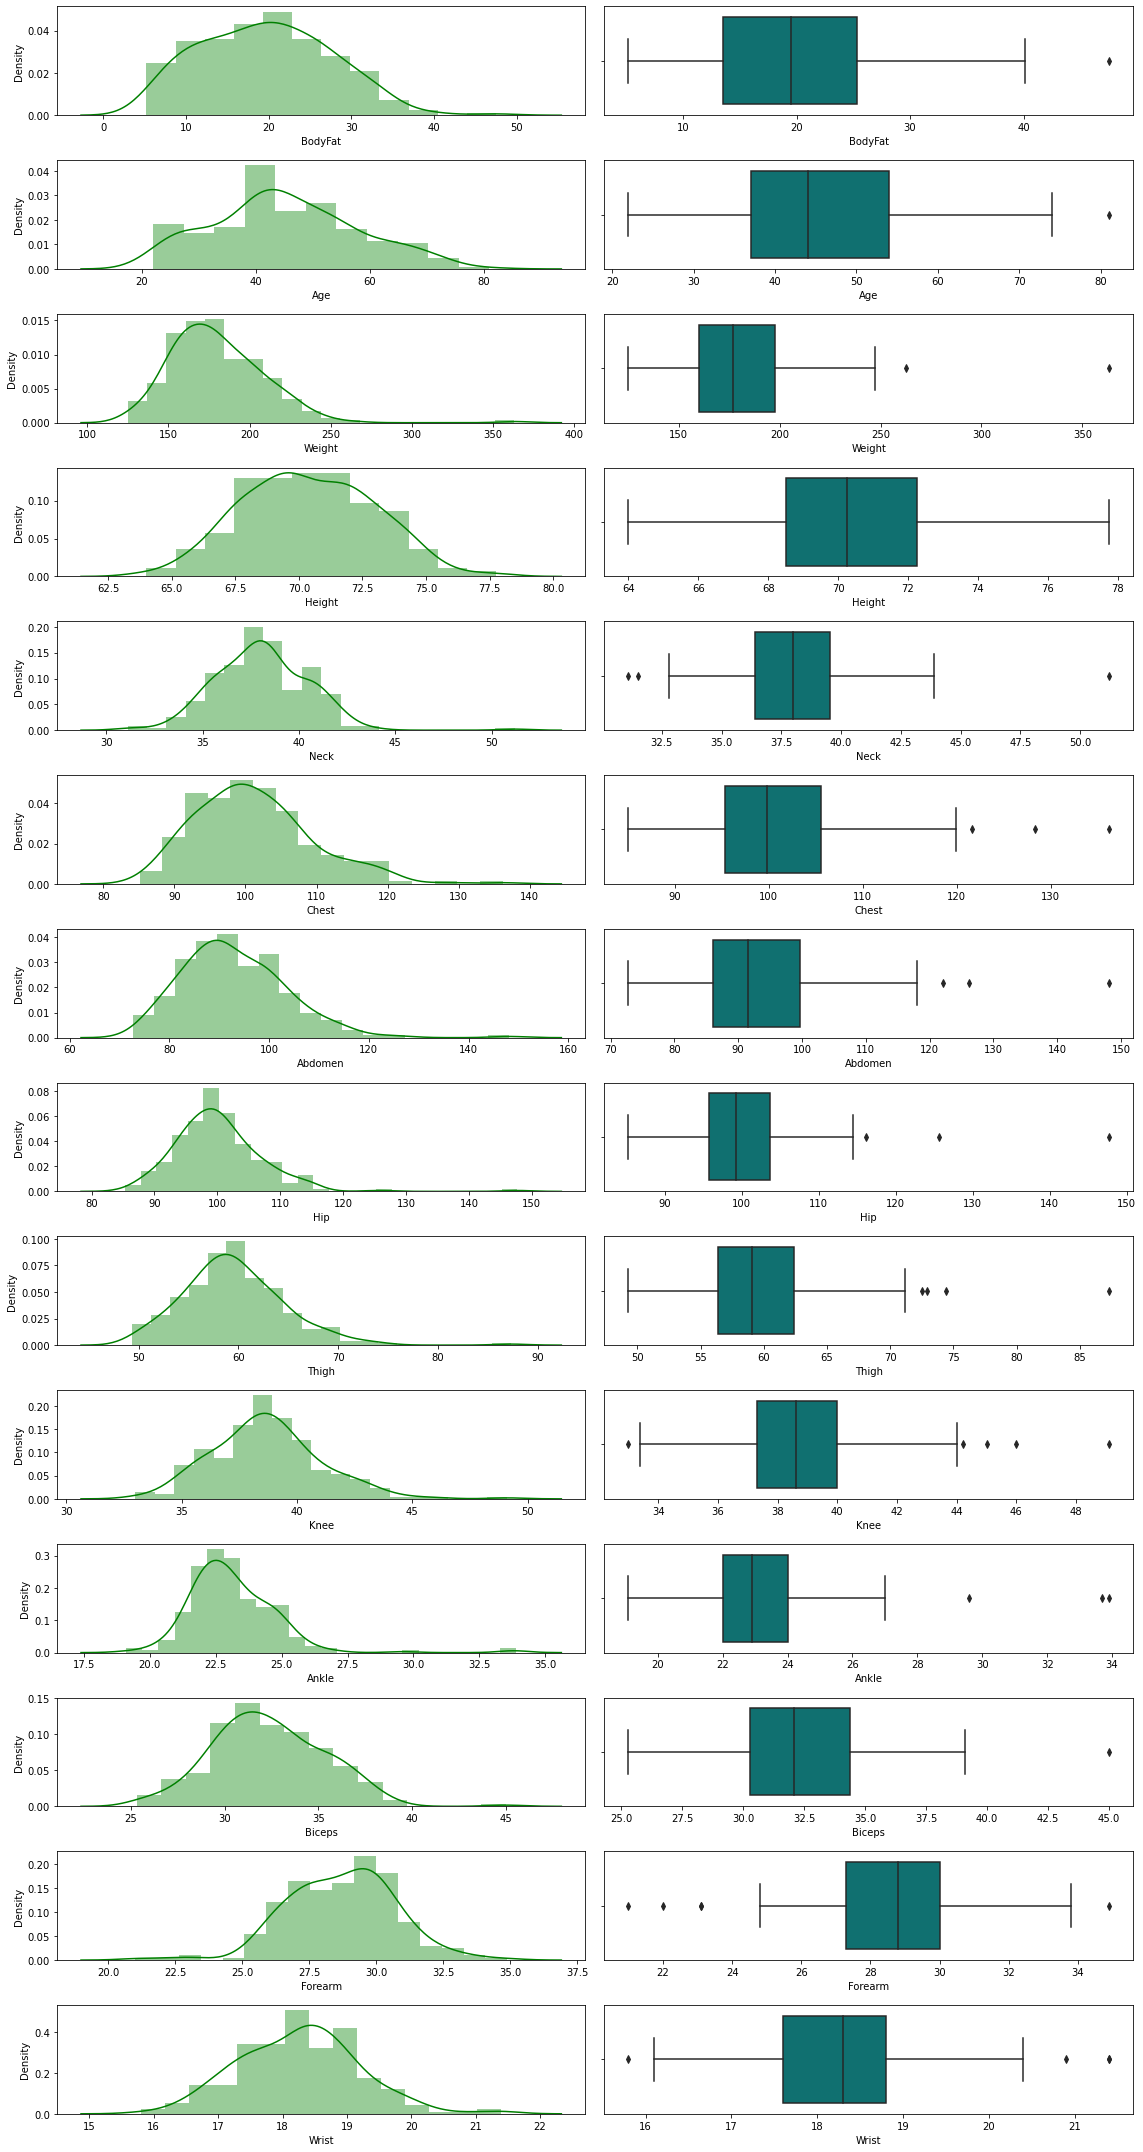

In [19]:
fig,ax = plt.subplots(14,2,figsize=(16,30))

for i, column in enumerate(df.columns):
    sns.distplot(df[column], ax=ax[i, 0], color= 'green')
    sns.boxplot(df[column], ax=ax[i, 1], color = 'teal')
fig.tight_layout()

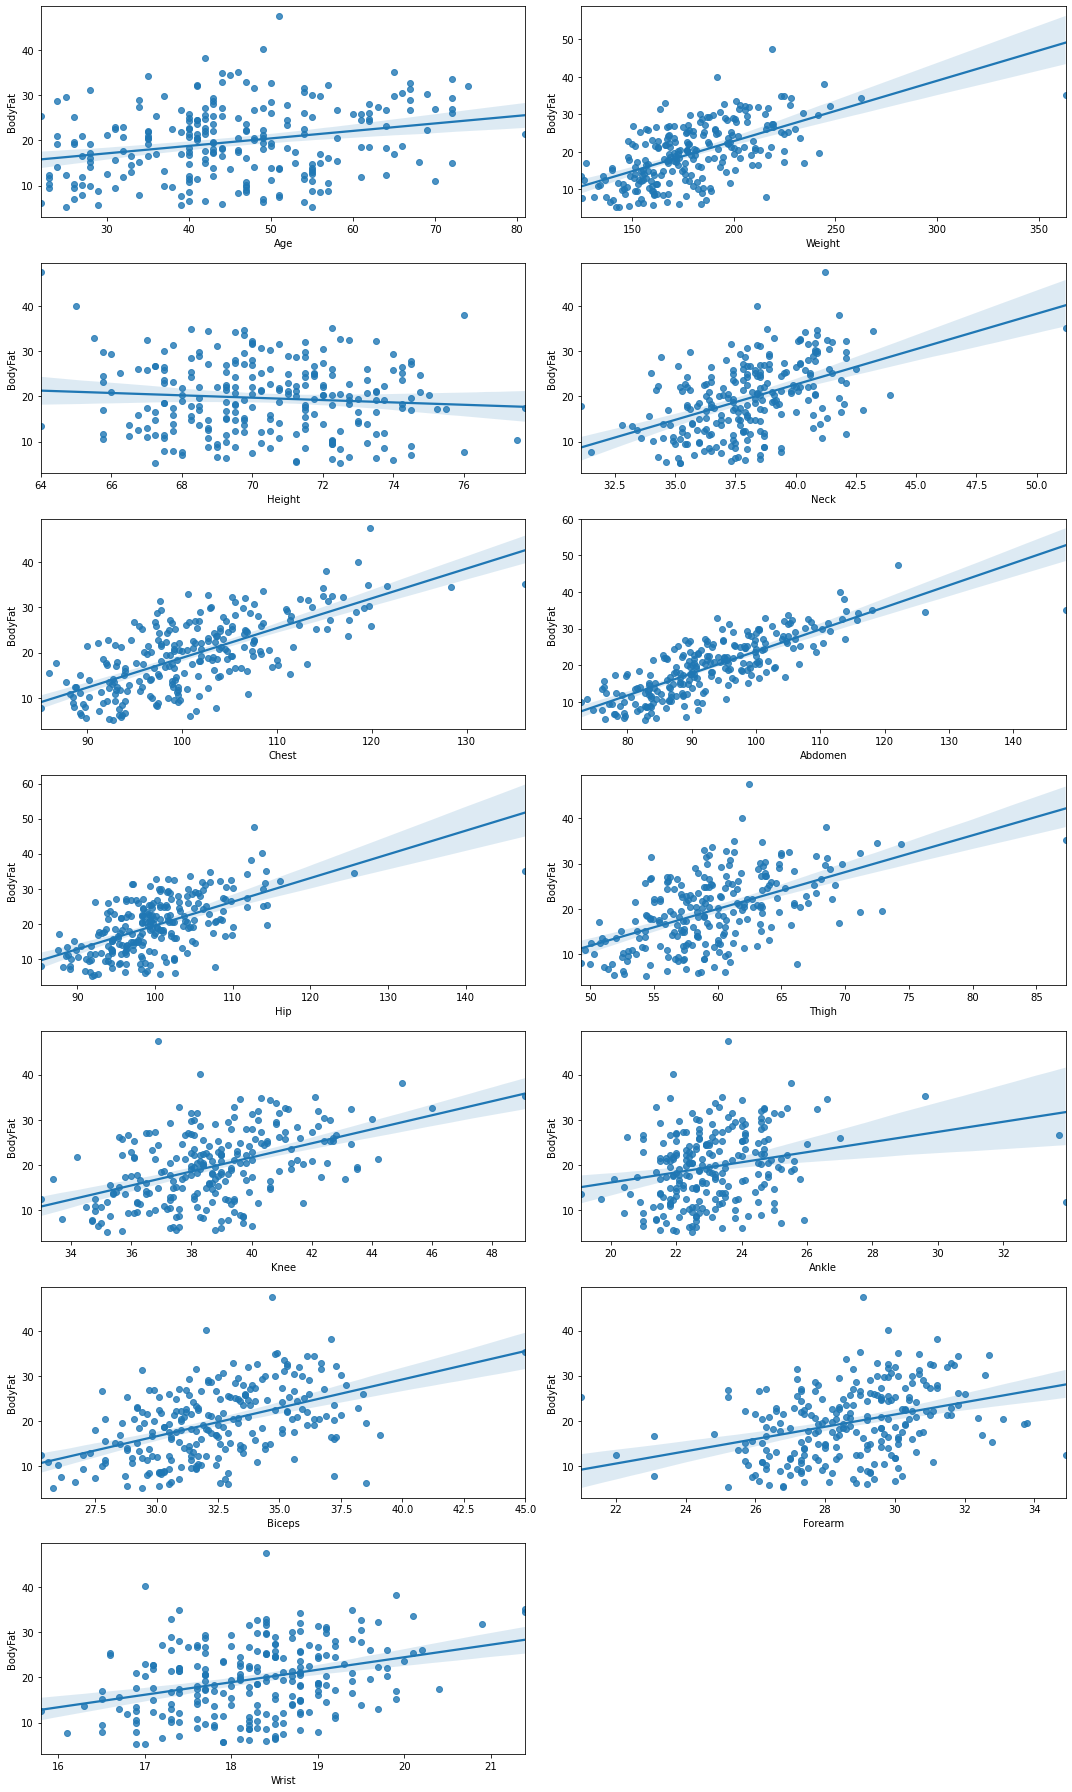

In [20]:
plt.figure(figsize=(15,25))

for i, column in enumerate(df.columns.drop('BodyFat')):
    plt.subplot(7, 2, i + 1)
    sns.regplot(data=df, x=column, y='BodyFat')

plt.tight_layout()

In [21]:
# Min and Max value before removing outliers

cols = df.columns
for col in cols:
    print(col, "(max) :", df[col].max(), end = '  ||  ', )
    print(col, "(min) :", df[col].min(), end = '\n\n', )

BodyFat (max) : 47.5  ||  BodyFat (min) : 5.2

Age (max) : 81  ||  Age (min) : 22

Weight (max) : 363.15  ||  Weight (min) : 125.0

Height (max) : 77.75  ||  Height (min) : 64.0

Neck (max) : 51.2  ||  Neck (min) : 31.1

Chest (max) : 136.2  ||  Chest (min) : 85.1

Abdomen (max) : 148.1  ||  Abdomen (min) : 72.8

Hip (max) : 147.7  ||  Hip (min) : 85.3

Thigh (max) : 87.3  ||  Thigh (min) : 49.3

Knee (max) : 49.1  ||  Knee (min) : 33.0

Ankle (max) : 33.9  ||  Ankle (min) : 19.1

Biceps (max) : 45.0  ||  Biceps (min) : 25.3

Forearm (max) : 34.9  ||  Forearm (min) : 21.0

Wrist (max) : 21.4  ||  Wrist (min) : 15.8



In [22]:
## Removing outliers

def remove_outliers(df, col):
    
    for col_name in col:
        q1 = df[col_name].quantile(0.25)
        q3 = df[col_name].quantile(0.75)
        
        iqr = q3 - q1
        
        lower = q1 - iqr * 1.5
        upper = q3 + iqr * 1.5
        
        df.loc[df[col_name] < lower, col_name] = lower
        df.loc[df[col_name] > upper, col_name] = upper
        
        
remove_outliers(df, df[df.columns.drop('BodyFat')])

In [23]:
# Min and Max value after removing outliers

cols = df.columns
for col in cols:
    print(col, "(max) :", df[col].max(), end = '  ||  ', )
    print(col, "(min) :", df[col].min(), end = '\n\n', )

BodyFat (max) : 47.5  ||  BodyFat (min) : 5.2

Age (max) : 79.5  ||  Age (min) : 22.0

Weight (max) : 253.5625  ||  Weight (min) : 125.0

Height (max) : 77.75  ||  Height (min) : 64.0

Neck (max) : 44.27499999999999  ||  Neck (min) : 31.675

Chest (max) : 120.89999999999998  ||  Chest (min) : 85.1

Abdomen (max) : 120.375  ||  Abdomen (min) : 72.8

Hip (max) : 115.57500000000003  ||  Hip (min) : 85.3

Thigh (max) : 71.47500000000001  ||  Thigh (min) : 49.3

Knee (max) : 44.050000000000004  ||  Knee (min) : 33.24999999999999

Ankle (max) : 27.0  ||  Ankle (min) : 19.1

Biceps (max) : 40.55  ||  Biceps (min) : 25.3

Forearm (max) : 34.05  ||  Forearm (min) : 23.25

Wrist (max) : 20.6  ||  Wrist (min) : 15.800000000000002



In [24]:
## splitting data into test and train

from sklearn.model_selection import train_test_split
# height is not significantly correlated to 
X = df.drop(['BodyFat', 'Height'], axis = 1)
y = df[['BodyFat']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [25]:
X_train.shape, X_test.shape

((194, 12), (49, 12))

In [26]:
# scaling the dataset

from sklearn.preprocessing import StandardScaler
sclr = StandardScaler()
X_scaled = pd.DataFrame(sclr.fit_transform(X), columns = X.columns)
X_train_scaled  = pd.DataFrame(sclr.fit_transform(X_train), columns = X_train.columns)
X_test_scaled = pd.DataFrame(sclr.transform(X_test), columns = X_test.columns)

In [27]:
## Importing Models
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [28]:
lr = LinearRegression()
r_forest = RandomForestRegressor()
sgdr = SGDRegressor(eta0=0.001)
xgbr = XGBRegressor()

models = [lr, r_forest, sgdr, xgbr]
model_name = ['Linear Regression', 'Random Forest', 'SGD Regressor', 'XGBoost']

mae_score = []
mse_score = []
rmse_score = []
r_2_score = []

for model in models:
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse= mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_pred, y_test)
    
    mae_score.append(mae)
    mse_score.append(mse)
    rmse_score.append(rmse)
    r_2_score.append(r2)

In [29]:
model_scores = pd.DataFrame({'Model Name': model_name, 'RMSE Score': rmse_score,
                            'MSE Score': mse_score, 'MAE Score' : mae_score, 'R2 SCore': r_2_score})

In [30]:
model_scores.sort_values(by = 'RMSE Score').round(3)

,Model Name,RMSE Score,MSE Score,MAE Score,R2 SCore
0,Linear Regression,4.300,18.492,3.544,0.519
2,SGD Regressor,4.418,19.517,3.540,0.462
1,Random Forest,4.619,21.337,3.679,0.429
3,XGBoost,4.800,23.039,3.597,0.462


The Linear Regression Model is performing well therefore I will use LinearRegression.

In [36]:
lr.predict(X_train_scaled.iloc[0:1,])

array([[14.23556946]])

In [31]:
import pickle

In [42]:
pickle.dump(sclr, open('scaling.pkl', 'wb'))

In [37]:
pickle.dump(lr, open('regression.pkl', 'wb'))

In [39]:
pickle_model = pickle.load(open('regression.pkl', 'rb'))

In [40]:
pickle_model.predict(X_train_scaled.iloc[:1,])

array([[14.23556946]])